## Final Project Submission

Please fill out:
* Student name: Julia Müller
* Student pace: self paced  
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


First, I want to load my data and do a quick inspection of the different sources. For this, I need to import the different packages that I foresee to use.

In [4]:
%cd zippedData

C:\Users\julia\Documents\Flatiron\Phase_1\Project1\dsc-phase-1-project-v2-4\zippedData


In [1]:
#importing the different packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from zipfile import ZipFile
from pandas import Series, DataFrame

In [139]:
# loading the temp.zip and creating a zip object
with ZipFile(r"C:\Users\julia\Documents\Flatiron\Phase_1\Project1\dsc-phase-1-project-v2-4\zippedData\im.db.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path=r"C:\Users\julia\Documents\Flatiron\Phase_1\Project1\dsc-phase-1-project-v2-4\zippedData")

In [5]:
#read in csv from Box Office Mojo (bom), TheMovieDb (tmd) and The Numbers budets (tnb)
bom = pd.read_csv("bom.movie_gross.csv.gz")
tmd = pd.read_csv("tmdb.movies.csv.gz")
tnb = pd.read_csv("tn.movie_budgets.csv.gz")

In [6]:
#read in tsv from rotten tomatoes one file movies (rtm) and reviews (rtr)
rtm = pd.read_csv("rt.movie_info.tsv.gz", sep="\t")
rtr = pd.read_csv("rt.reviews.tsv.gz", sep="\t", encoding = ("latin-1"))

In [46]:
data = [bom, tmd, tnb, rtm, rtr]
for i in data:
    print(i.info())
    print(i.head())
    print(i.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  

The BOM dataframe contains around 3300 entries with 5 columns (title, studio, domestic_gross, foreign_gross and year. There are some missing values specifically for foreign_gross.
The TMD dataframe contains around 26500 entries with 10 columns ('Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date', 'title', 'vote_average', 'vote_count'). There are no missing values
The TNB dataframe contains around 5700 entries with 6 columns ('id', 'release_date', 'movie', 'production_budget', 'domestic_gross','worldwide_gross'). There are no missing values

In [7]:
con = sqlite3.connect("im.db")
cur = con.cursor()
schema_df = pd.read_sql("""
SELECT *
FROM sqlite_master
""", con)
schema_df

In [32]:
q = pd.read_sql("""
SELECT b.start_year, COUNT(*) AS n_movies 
FROM movie_basics as b
JOIN movie_ratings as r
USING (movie_id)
WHERE b.start_year BETWEEN 2017 AND 2020
GROUP BY b.start_year
""", con)
q.head(10)

,start_year,n_movies
0,2017,8713
1,2018,7526
2,2019,2180


In [20]:
q1 = pd.read_sql("""
SELECT * 
FROM principals
JOIN movie_ratings
USING (movie_id)
""", con)
q1.head()

,movie_id,ordering,person_id,category,job,characters,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,None,None,3.9,2328
1,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",3.9,2328
2,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",3.9,2328
3,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",3.9,2328
4,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]",3.9,2328


In [15]:
q2 = pd.read_sql("""
SELECT * 
FROM movie_ratings
LIMIT 10
""", con)
q2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [19]:
q3 = pd.read_sql("""
SELECT * 
FROM movie_akas
WHERE language = "en"
LIMIT 10
""", con)
q3

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt10027708,2,Miguelito,XWW,en,imdbDisplay,None,0.0
1,tt10027708,4,Miguelito,AU,en,None,None,0.0
2,tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,en,imdbDisplay,None,0.0
3,tt1014759,3,Alice in Wonderland,JP,en,None,None,0.0
4,tt10225354,3,Returning Home,XWW,en,alternative,None,0.0
5,tt10225420,2,The Universe in Which I Loved You,XWW,en,imdbDisplay,None,0.0
6,tt10308634,3,Young Clients,XWW,en,alternative,None,0.0
7,tt1182315,2,Black Buenos Aires,XWW,en,imdbDisplay,None,0.0
8,tt1233259,1,Prince Killian and the Holy Grail,CA,en,None,DVD box title,0.0
9,tt1263750,19,Room in Rome,XWW,en,imdbDisplay,None,0.0


In [40]:
q4 = pd.read_sql("""
SELECT b.genres, SUM(numvotes) AS votes, AVG(r.averagerating) AS avg_rating
FROM movie_ratings as r
LEFT JOIN movie_basics as b
USING (movie_id)
WHERE start_year BETWEEN 2015 AND 2020
GROUP BY b.genres
ORDER BY votes DESC, avg_rating DESC
""", con)
q4

,genres,votes,avg_rating
0,"Action,Adventure,Sci-Fi",8508126,5.428571
1,"Action,Adventure,Fantasy",5972775,5.790566
2,"Action,Adventure,Comedy",4573290,5.533333
3,"Adventure,Animation,Comedy",3468681,5.939130
4,Drama,2810070,6.597468
...,...,...,...
766,"History,Sport",5,9.200000
767,"Action,Documentary,Horror",5,6.400000
768,"Documentary,Family,Romance",5,6.200000
769,"Family,War",5,5.800000


In [45]:
genres = q4["genres"]

In [58]:
lofgen = []
for genre in genres:
    if genre is not None:
        lofgen.extend(genre.split(","))
lofgen = list(set(lofgen))    

In [26]:
movies = pd.read_sql("""
SELECT r.movie_id, a.title, r.averagerating, r.numvotes, b.genres 
FROM movie_ratings as r
LEFT JOIN movie_basics as b
USING (movie_id)
LEFT JOIN movie_akas as a
USING (movie_id)
WHERE language = "en"
ORDER BY r.averagerating DESC
""", con)
movies = movies.drop_duplicates(subset=["movie_id"])


In [60]:
#Join the Mojo data with IMDB data and take only those where both records exist
movies_m = movies.merge(bom, how = "inner", on="title")
movies_m["foreign_gross"] = movies_m["foreign_gross"].fillna(0) #replace values where foreign gross is NaN
movies_m["foreign_gross"] = movies_m["foreign_gross"].apply(lambda x: 0 if x==0 else float(x.split()[0].replace(",",""))) #reformat as float
movies_m["combined_gross"] = movies_m.apply(lambda x: x["domestic_gross"] + x["foreign_gross"], axis=1) #calculate overall gross
movies_m.head()

In [65]:
s = movies_m["genres"].str.split(",").apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = "genres"
del movies_m["genres"]
df = movies_m.join(s)
df.info()

C:\Users\julia\AppData\Local\Temp\ipykernel_1328\2861643340.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movies_m["genres"].str.split(",").apply(Series, 1).stack()
C:\Users\julia\AppData\Local\Temp\ipykernel_1328\2861643340.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movies_m["genres"].str.split(",").apply(Series, 1).stack()
C:\Users\julia\AppData\Local\Temp\ipykernel_1328\2861643340.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = movies_m["genres"].str.split(",").apply(Series, 1).stack()
C:\Users\julia\AppData\Local\Temp\ipykernel_1328\2861643340.py:1: FutureWarning: The default dtype for empty Series will be 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 0 to 790
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        1735 non-null   object 
 1   title           1735 non-null   object 
 2   averagerating   1735 non-null   float64
 3   numvotes        1735 non-null   int64  
 4   studio          1734 non-null   object 
 5   domestic_gross  1718 non-null   float64
 6   foreign_gross   1735 non-null   float64
 7   year            1735 non-null   int64  
 8   combined_gross  1718 non-null   float64
 9   genres          1731 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 149.1+ KB


In [66]:
df.head()

,movie_id,title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,combined_gross,genres
0,tt1375666,Inception,8.8,1841066,WB,292600000.0,535700000.0,2010,828300000.0,Action
0,tt1375666,Inception,8.8,1841066,WB,292600000.0,535700000.0,2010,828300000.0,Adventure
0,tt1375666,Inception,8.8,1841066,WB,292600000.0,535700000.0,2010,828300000.0,Sci-Fi
1,tt0816692,Interstellar,8.6,1299334,Par.,188000000.0,489400000.0,2014,677400000.0,Adventure
1,tt0816692,Interstellar,8.6,1299334,Par.,188000000.0,489400000.0,2014,677400000.0,Drama


In [84]:
#Group movie list by genre and add the mean of domestic_gross as well as the count (to know how many movies there are)#
#and the average rating
df1 = df.groupby(["genres"]).agg({"domestic_gross": ["mean", "count"], "averagerating": ["mean"]})
df1.columns = ["domestic_gross_mean", "movie_count", "averagerating"]
df1 = df1.reset_index() #reset index to remove multilayer
df2 = df1[df1["movie_count"] > 30] #only select the genres with more than 30 movies
df2 = df2.sort_values(by="domestic_gross_mean", ascending=False) #sort genres by gross 
df2

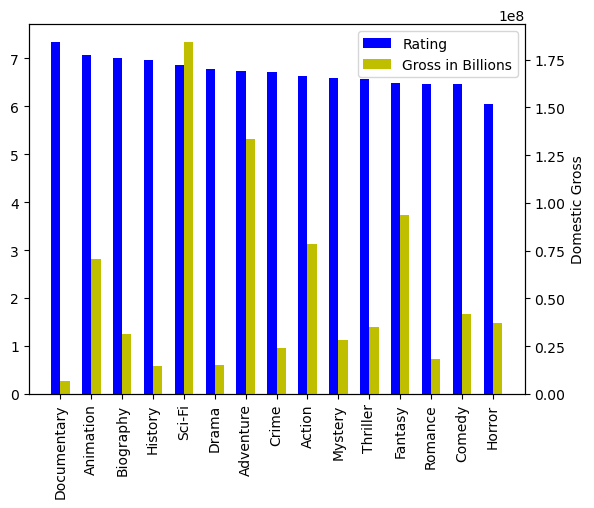

In [97]:
x = np.arange(15)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective Genre names.
plt.xticks(x + w /2, df2['genres'], rotation='vertical')
rating =ax1.bar(x, df2['averagerating'], width=w, color='b', align='center')
#use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
#gross bars.
gross =ax2.bar(x + w, df2['domestic_gross_mean'], width=w,color='y',align='center')
#Set the Y axis label as gross.
plt.ylabel('Domestic Gross')
#To set the legend on the plot we have used plt.legend()
plt.legend([rating, gross],['Rating', 'Gross in Billions'])
#To show the plot finally we have used plt.show().
plt.show()

In [11]:
movies = movies.dropna(axis = 0)
movies.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35301 entries, 0 to 35633
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       35301 non-null  object 
 1   averagerating  35301 non-null  float64
 2   numvotes       35301 non-null  int64  
 3   genres         35301 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [12]:
s = movies["genres"].str.split(",").apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = "genres"
del movies["genres"]
df = movies.join(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60467 entries, 0 to 35633
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       60467 non-null  object 
 1   averagerating  60467 non-null  float64
 2   numvotes       60467 non-null  int64  
 3   genres         60467 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [13]:
df2 = df.groupby("genres", as_index=False)["averagerating"].agg(["mean","count"])

In [14]:
df3 = df2.query("count >= 100").sort_values(by=["mean"], ascending=False)
df3

,mean,count
genres,,
Documentary,7.392954,8132
News,7.234109,129
Biography,7.123883,1566
History,7.049687,1117
Music,7.008500,800
Sport,6.998571,560
Musical,6.598746,319
War,6.580149,403
Drama,6.446439,14589


In [16]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
bom.sort_values(by=["year"], ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
